In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)


In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
X=df.drop(columns=['Exited'])
Y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2024-06-09 11:57:54.325819: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 11:57:54.325960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 11:57:54.511630: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation = 'relu' ))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history=model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7719 - loss: 0.5568 - val_accuracy: 0.7994 - val_loss: 0.4764
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4796 - val_accuracy: 0.8031 - val_loss: 0.4422
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.4514 - val_accuracy: 0.8281 - val_loss: 0.4189
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4119 - val_accuracy: 0.8394 - val_loss: 0.4013
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8401 - loss: 0.3841 - val_accuracy: 0.8462 - val_loss: 0.3863
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.3780 - val_accuracy: 0.8531 - val_loss: 0.3790
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.3494 - val_accuracy: 0.8531 - val_loss: 0.3677
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8492 - loss: 0.3584 - val_accu

In [19]:
model.layers[0].get_weights()

[array([[-1.30658224e-01, -1.70980349e-01, -5.98094251e-04,
          4.85334784e-01, -1.05994202e-01,  2.92987581e-02,
          1.74637541e-01, -1.47577971e-01, -3.62536341e-01,
         -2.08221540e-01, -1.12110842e-02],
        [-4.30222750e-01,  2.08042800e-01,  6.19305432e-01,
         -8.49852040e-02, -4.38504338e-01,  9.43776250e-01,
         -6.71508491e-01, -6.27147734e-01,  6.16476499e-02,
         -6.17339969e-01,  7.01345682e-01],
        [ 3.75229567e-02, -3.54215503e-01,  2.06465527e-01,
          1.59639031e-01,  2.86817431e-01,  1.46520128e-02,
         -1.74645409e-02, -1.61556583e-02, -2.60763407e-01,
         -1.93763629e-01, -1.21992151e-03],
        [-5.74964225e-01, -1.17234302e+00, -3.60510856e-01,
         -7.38826454e-01,  1.29344761e-01,  2.73011506e-01,
          2.44682059e-01,  6.05211854e-01, -7.30396748e-01,
          2.72643805e-01,  8.94548669e-02],
        [-1.19671509e-01, -1.75598279e-01, -2.40631169e-03,
         -1.73228145e-01, -1.97377950e-01,  

In [20]:
model.layers[1].get_weights()

[array([[ 2.48157188e-01,  6.06391430e-01, -2.86645442e-01,
         -3.19766700e-01,  1.30880222e-01,  1.96111828e-01,
         -3.43582094e-01,  5.64721167e-01, -2.47250319e-01,
         -2.60456860e-01,  3.69727314e-01],
        [-8.85648847e-01, -4.69405949e-01, -4.74624246e-01,
         -4.08443749e-01, -2.08700076e-01, -4.62882780e-02,
          5.68149090e-01,  7.95679033e-01, -1.85134690e-02,
          4.53604370e-01,  2.19016254e-01],
        [-5.16910970e-01, -5.36104679e-01, -8.10766578e-01,
          6.70887113e-01, -4.11525726e-01, -6.62628531e-01,
         -4.37362283e-01,  9.06350762e-02, -1.98003247e-01,
          4.03215408e-01,  4.69674170e-01],
        [ 2.86331505e-01,  3.20909351e-01, -9.87898931e-02,
          3.18014532e-01, -4.88348603e-01,  4.19019967e-01,
         -1.10242593e+00,  1.06589741e-03,  1.28060997e-01,
          1.84500873e-01, -7.21889973e-01],
        [ 2.08826602e-01,  5.04629791e-01,  4.38769519e-01,
         -5.93665361e-01, -9.11191106e-01,  

In [21]:
model.layers[2].get_weights()

[array([[ 0.7837228 ],
        [-0.7509323 ],
        [ 0.8899505 ],
        [-0.53580207],
        [ 1.3625777 ],
        [-0.48683363],
        [ 0.605774  ],
        [ 0.7482775 ],
        [-0.30122897],
        [-0.5665255 ],
        [-1.0606033 ]], dtype=float32),
 array([-0.14707106], dtype=float32)]

In [22]:
y=model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
y_pred=np.where(y>0.5,1,0)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8625

In [25]:
import matplotlib.pyplot as plt

In [26]:
history.history

{'accuracy': [0.7881249785423279,
  0.7964062690734863,
  0.8182812333106995,
  0.83203125,
  0.8393750190734863,
  0.8467187285423279,
  0.8512499928474426,
  0.8520312309265137,
  0.8537499904632568,
  0.854687511920929,
  0.8565624952316284,
  0.8576562404632568,
  0.8571875095367432,
  0.8576562404632568,
  0.8600000143051147,
  0.8587499856948853,
  0.8606250286102295,
  0.860156238079071,
  0.8610937595367432,
  0.8606250286102295,
  0.8620312213897705,
  0.8615624904632568,
  0.8618749976158142,
  0.8623437285423279,
  0.8639062643051147,
  0.8645312786102295,
  0.8653125166893005,
  0.8650000095367432,
  0.8659374713897705,
  0.8651562333106995,
  0.8668749928474426,
  0.8659374713897705,
  0.8659374713897705,
  0.8681250214576721,
  0.8662499785423279,
  0.8662499785423279,
  0.8659374713897705,
  0.8668749928474426,
  0.8690624833106995,
  0.8673437237739563,
  0.8670312762260437,
  0.8659374713897705,
  0.866406261920929,
  0.8657812476158142,
  0.8678125143051147,
  0.86765

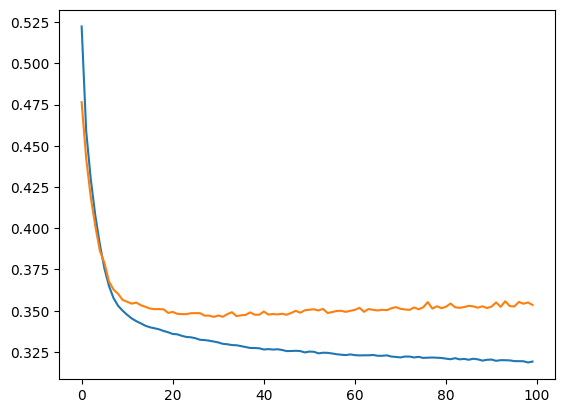

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

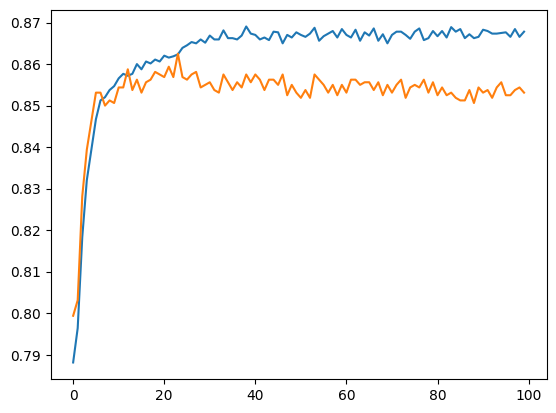

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])